<a href="https://colab.research.google.com/github/programmermahi/Machine-Learning-Lab/blob/main/Lab_Report_02(221902083).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 98.57%
Confusion Matrix:
[[965   1]
 [ 15 134]]
Precision: 0.99
Recall: 0.90
F1 Score: 0.94


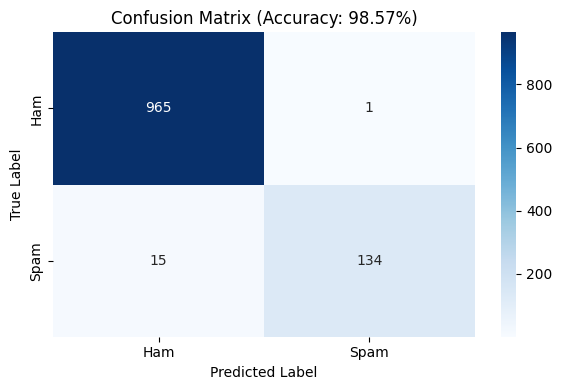

/tmp/ipython-input-3-1175205348.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='coolwarm')


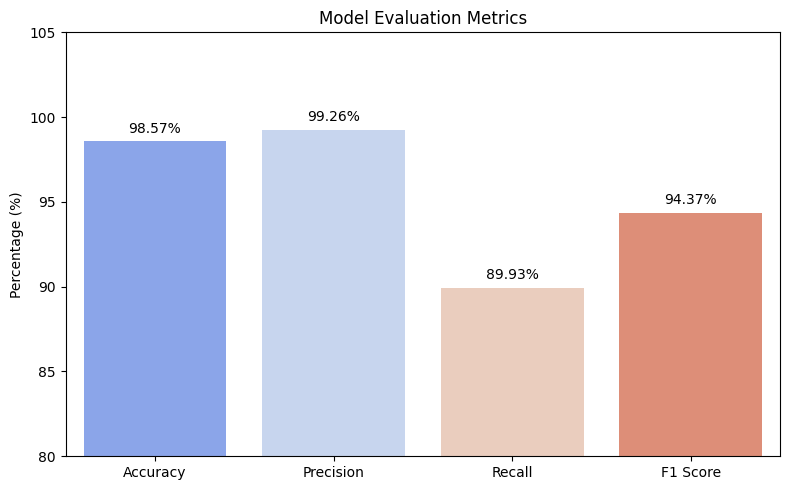

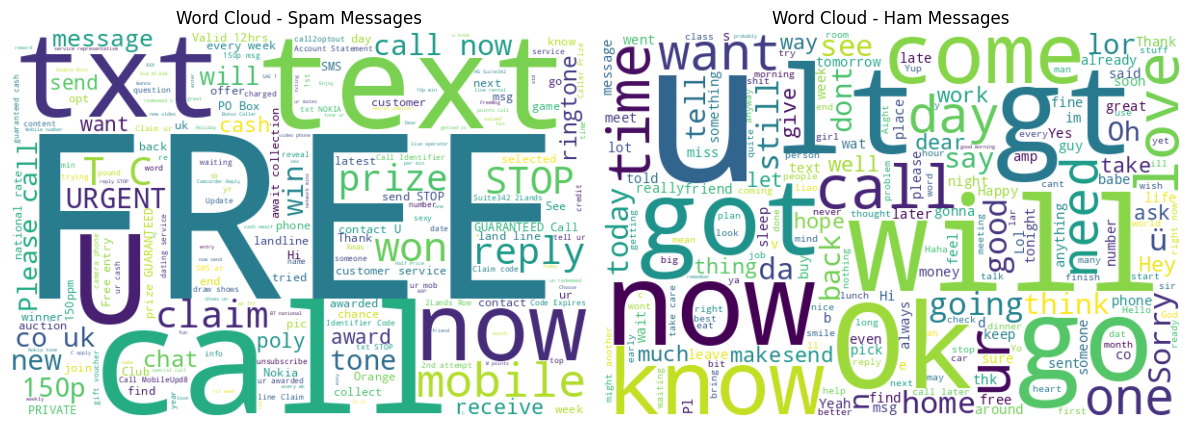

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("mail_data.csv")
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# -------------------------------
# 📊 1. Confusion Matrix Heatmap
# -------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f}%)')
plt.tight_layout()
plt.show()

# -------------------------------
# 📊 2. Bar Chart of Metrics
# -------------------------------
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision * 100, recall * 100, f1 * 100]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='coolwarm')
plt.ylim(80, 105)
plt.ylabel("Percentage (%)")
plt.title("Model Evaluation Metrics")
for i, val in enumerate(values):
    plt.text(i, val + 0.5, f"{val:.2f}%", ha='center')
plt.tight_layout()
plt.show()

# -------------------------------
# ☁️ 3. Word Clouds for Spam & Ham
# -------------------------------
spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

plt.figure(figsize=(12, 6))

# Spam word cloud
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Word Cloud - Spam Messages")
plt.axis('off')

# Ham word cloud
plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("Word Cloud - Ham Messages")
plt.axis('off')

plt.tight_layout()
plt.show()
